# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
import re
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import time
from sklearn.metrics import accuracy_score
from nltk.tokenize import TweetTokenizer
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import string
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import nltk
from sklearn.calibration import CalibratedClassifierCV
import gc
from scipy import sparse

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import contractions

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset Loading

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [ ]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


In [ ]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [ ]:
features = list(train.columns)
features

['id',
 'comment_text',
 'toxic',
 'severe_toxic',
 'obscene',
 'threat',
 'insult',
 'identity_hate']

In [ ]:
COMMENT = 'comment_text'
train[COMMENT].fillna("unknown", inplace=True)
test[COMMENT].fillna("unknown", inplace=True)

In [ ]:
comments = train.drop(['id','comment_text'],axis = 1)
for i in comments.columns :
    print("Percent of {0}s: ".format(i), round(100*comments[i].mean(),2), "%")

Percent of toxics:  9.58 %
Percent of severe_toxics:  1.0 %
Percent of obscenes:  5.29 %
Percent of threats:  0.3 %
Percent of insults:  4.94 %
Percent of identity_hates:  0.88 %


# Data Visualisation

In [ ]:
def plot_features_distribution(features, title):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        sns.distplot(train.loc[~train[feature].isnull(),feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

<ipython-input-15-2300778a1316>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[~train[feature].isnull(),feature],kde=True,hist=False, bins=120, label=feature)
<ipython-input-15-2300778a1316>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[~train[feature].

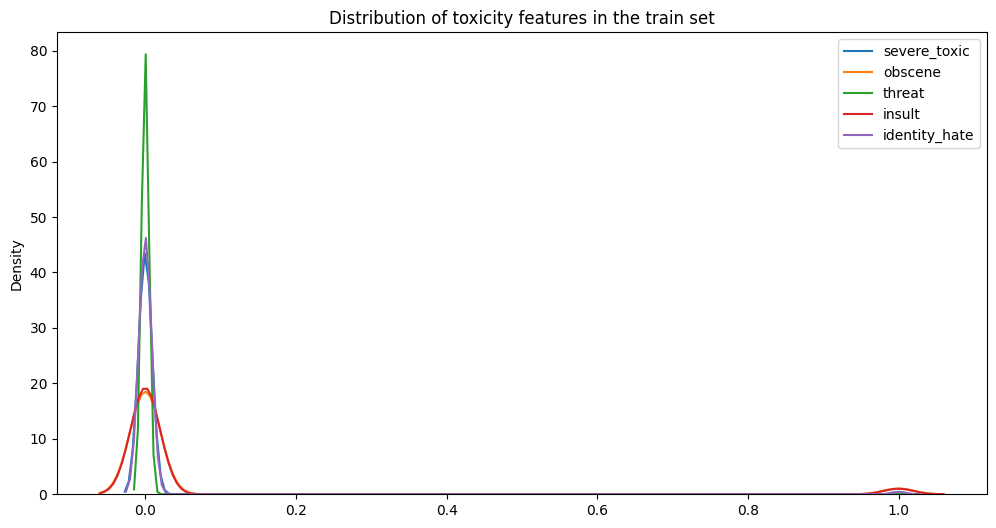

In [ ]:
features = list(train.columns)[3:8]
plot_features_distribution(features, "Distribution of toxicity features in the train set")

In [ ]:
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

In [ ]:
vals1, counts1 = np.unique(train['toxic'] , return_counts=True)
print(vals1, counts1)
#There are 15294 occurances of unwanted words in toxic and 144277 occurances of wanted words in toxic.

[0 1] [144277  15294]


In [ ]:
vals2, counts2 = np.unique(train['severe_toxic'] , return_counts=True)
print(vals2, counts2)

[0 1] [157976   1595]


In [ ]:
vals3, counts3 = np.unique(train['obscene'] , return_counts=True)
print(vals3, counts3)

[0 1] [151122   8449]


In [ ]:
vals4, counts4 = np.unique(train['threat'] , return_counts=True)
print(vals4, counts4)

[0 1] [159093    478]


In [ ]:
vals5, counts5 = np.unique(train['insult'] , return_counts=True)
print(vals5, counts5)

[0 1] [151694   7877]


In [ ]:
vals6, counts6 = np.unique(train['identity_hate'] , return_counts=True)
print(vals6, counts6)

[0 1] [158166   1405]


In [ ]:
counts = [counts1[1], counts2[1], counts3[1], counts4[1], counts5[1], counts6[1]]

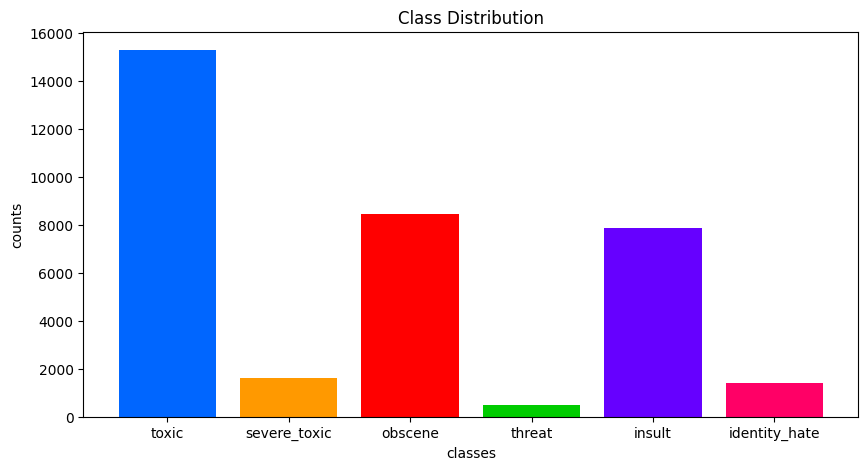

In [ ]:
plt.figure(figsize=(10, 5))
colors=['#0066ff', '#ff9900', '#ff0000', '#00cc00', '#6600ff', '#ff0066']
plt.bar(classes, counts, color=colors)
plt.title('Class Distribution')
plt.xlabel('classes')
plt.ylabel('counts')
plt.show()

In [ ]:
#Total unwanted words in each classes
for i in range(len(classes)):
    print(f"Total unwanted words in {classes[i]} class: {counts[i]}")

Total unwanted words in toxic class: 15294
Total unwanted words in severe_toxic class: 1595
Total unwanted words in obscene class: 8449
Total unwanted words in threat class: 478
Total unwanted words in insult class: 7877
Total unwanted words in identity_hate class: 1405


In [ ]:
train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
lens = train.comment_text.str.len()

In [ ]:
lens.mean(), lens.std(), lens.max()

(394.0732213246768, 590.7202819048919, 5000)

<Axes: >

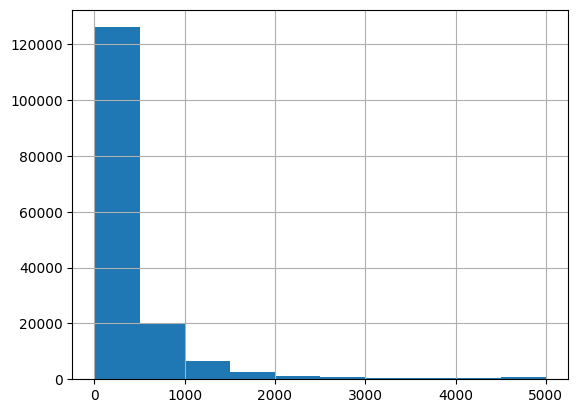

In [ ]:
lens.hist()

# Preprocessing

In [ ]:
train["text_clean"] = train["comment_text"].apply(lambda x: x.lower())
display(train.head())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"""\nmore\ni can't make any real suggestions on ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"you, sir, are my hero. any chance you remember..."


In [ ]:
train = train.drop(['id'], axis=1)
train

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_clean
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it..."
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"""\nmore\ni can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"you, sir, are my hero. any chance you remember..."
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,""":::::and for the second time of asking, when ..."
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,you should be ashamed of yourself \n\nthat is ...
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,"spitzer \n\numm, theres no actual article for ..."
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,and it looks like it was actually you who put ...


## Wordclouds - Frequent words:


In [ ]:
stopwords=set(STOPWORDS)

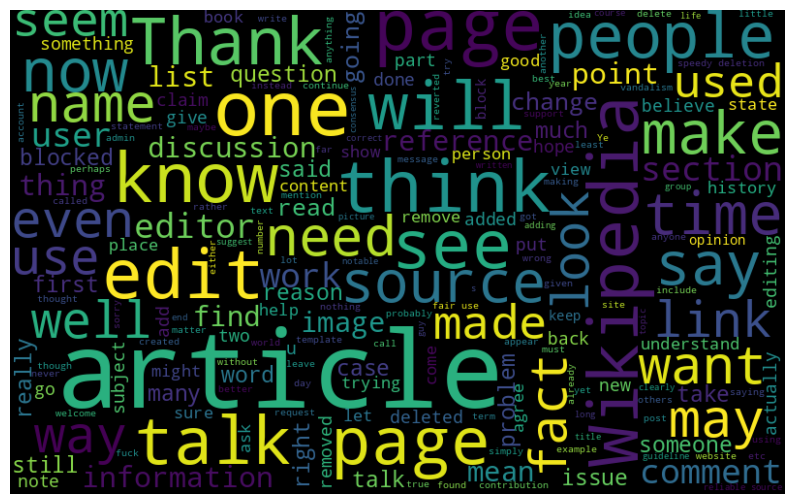

In [ ]:
# wordcloud for clean comments
words = ' '.join(train['comment_text'])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

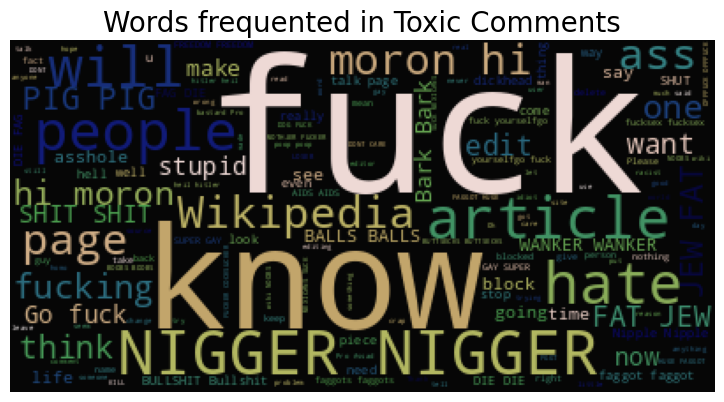

In [ ]:
#Toxic comments
subset = train[train.toxic==1]
text = subset.comment_text.values
wc = WordCloud(background_color="black", max_words=4000, stopwords=stopwords)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(222)
plt.axis("off")
plt.title("Words frequented in Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap='gist_earth', random_state=244), alpha=0.98)

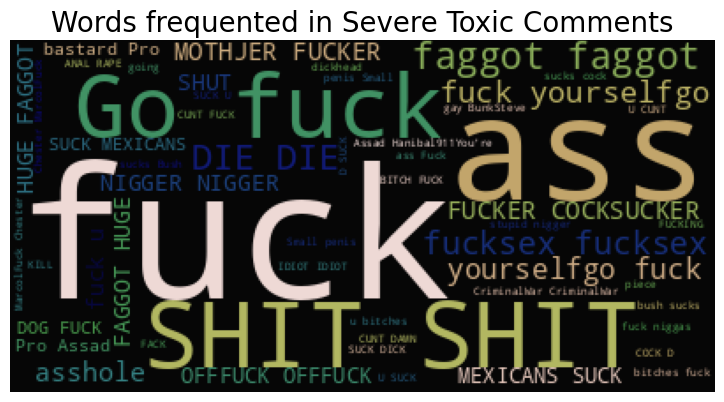

In [ ]:
#Severely toxic comments
subset = train[train.severe_toxic==1]
text = subset.comment_text.values
wc = WordCloud(background_color="black", max_words=4000, stopwords=stopwords)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(223)
plt.axis("off")
plt.title("Words frequented in Severe Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap='gist_earth', random_state=244), alpha=0.98)

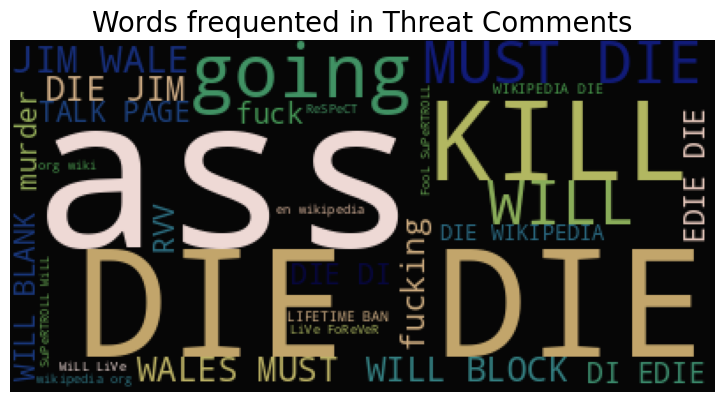

In [ ]:
#Threat comments
subset = train[train.threat==1]
text = subset.comment_text.values
wc = WordCloud(background_color="black", max_words=4000, stopwords=stopwords)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(224)
plt.axis("off")
plt.title("Words frequented in Threat Comments", fontsize=20)
plt.imshow(wc.recolor(colormap='gist_earth', random_state=244), alpha=0.98)

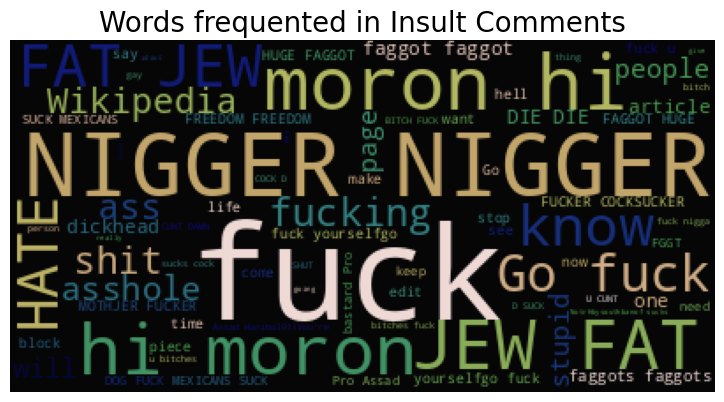

In [ ]:
#Insult comments
subset = train[train.insult==1]
text = subset.comment_text.values
wc = WordCloud(background_color="black", max_words=4000, stopwords=stopwords)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(222)
plt.axis("off")
plt.title("Words frequented in Insult Comments", fontsize=20)
plt.imshow(wc.recolor(colormap='gist_earth', random_state=244), alpha=0.98)

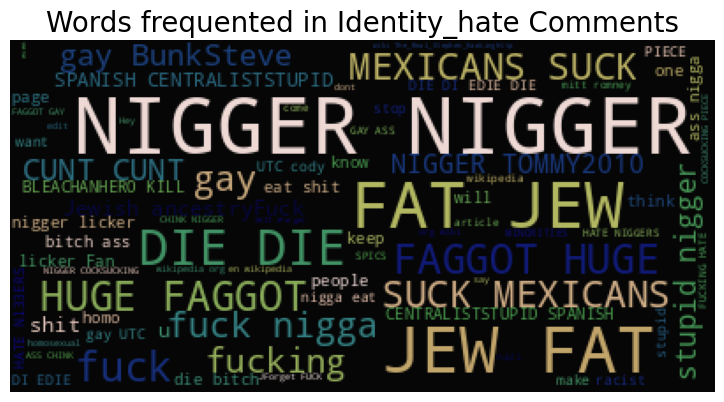

In [ ]:
#Identity_hate comments
subset = train[train.identity_hate==1]
text = subset.comment_text.values
wc = WordCloud(background_color="black", max_words=4000, stopwords=stopwords)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in Identity_hate Comments", fontsize=20)
plt.imshow(wc.recolor(colormap='gist_earth', random_state=244), alpha=0.98)

## Text Cleaning

In [ ]:
train["text_clean"] = train["text_clean"].apply(lambda x: contractions.fix(x))

# double check
print(train["comment_text"][67])
print(train["text_clean"][67])
print(train["comment_text"][12])
print(train["text_clean"][12])

I went there around the same time he did, and that certainly was not the case at the time. Later on they stopped taking children from such a young age.
i went there around the same time he did, and that certainly was not the case at the time. later on they stopped taking children from such a young age.
Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...
hey... what is it..
@ | talk .
what is it... an exclusive group of some wp talibans...who are good at destroying, self-appointed purist who gang up any one who asks them questions about their anti-social and destructive (non)-contribution at wp?

ask sityush to clean up his behavior than issue me nonsensical warnings...


In [ ]:
def remove_URL(text):
    return re.sub(r"https?://\S+|www\.\S+", "", text)
train["text_clean"] = train["text_clean"].apply(lambda x: remove_URL(x))

In [ ]:
def remove_html(text):
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)
train["text_clean"] = train["text_clean"].apply(lambda x: remove_html(x))

In [ ]:
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7f]',r'', text)
train["text_clean"] = train["text_clean"].apply(lambda x: remove_non_ascii(x))

In [ ]:
def remove_punct(text):
    return text.translate(str.maketrans('', '', string.punctuation))
train["text_clean"] = train["text_clean"].apply(lambda x: remove_punct(x))

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Tokenizing the tweet base texts.
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Removing stopwords
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
train['stopwords_removed'] = train["text_clean"].apply(lambda x: [word for word in x if word not in stop])
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_clean,stopwords_removed
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...,"[e, x, p, l, n, n, \n, w, h, , h, e, , e, ,..."
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww he matches this background colour i am se...,"[w, w, , h, e, , c, h, e, , h, , b, c, k, ..."
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i am really not trying to edit war it ...,"[h, e, , n, , , , r, e, l, l, , n, , r, ..."
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,\nmore\ni cannot make any real suggestions on ...,"[\n, r, e, \n, , c, n, n, , k, e, , n, , r..."
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...,"[u, , r, , r, e, , , h, e, r, , n, , c, ..."


In [ ]:
def lancaster_stemmer(text):
    stemmer = nltk.LancasterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

train['lancaster_stemmer'] = train['stopwords_removed'].apply(lambda x: lancaster_stemmer(x))
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_clean,stopwords_removed,lancaster_stemmer
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...,"[e, x, p, l, n, n, \n, w, h, , h, e, , e, ,...","[e, x, p, l, n, n, \n, w, h, , h, e, , e, ,..."
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww he matches this background colour i am se...,"[w, w, , h, e, , c, h, e, , h, , b, c, k, ...","[w, w, , h, e, , c, h, e, , h, , b, c, k, ..."
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i am really not trying to edit war it ...,"[h, e, , n, , , , r, e, l, l, , n, , r, ...","[h, e, , n, , , , r, e, l, l, , n, , r, ..."
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,\nmore\ni cannot make any real suggestions on ...,"[\n, r, e, \n, , c, n, n, , k, e, , n, , r...","[\n, r, e, \n, , c, n, n, , k, e, , n, , r..."
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...,"[u, , r, , r, e, , , h, e, r, , n, , c, ...","[u, , r, , r, e, , , h, e, r, , n, , c, ..."


In [ ]:
x = train['comment_text']
y = train.iloc[:, 1:7]

In [ ]:
x

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13)

In [ ]:
X_train

39114     Okay so no one's gonna address this? Guess tha...
93440     "\n\n In regards to wishful thinking \n\n""Due...
16685     Ok, so put the pictures somewhere in the artic...
87443     |I apologise for making that remark to Sidaway...
35332     "\n\nAt some point in the article's history, t...
                                ...                        
144628    I say we split off for the most often used key...
58266     "\nI can barely find any information at all ab...
81891     "\nYou are actually trying to goad me into an ...
25324     Result: Fake editors having a fake discussion ...
65689     ", 15 April 2009 (UTC)\n Ok. I didn't say it "...
Name: comment_text, Length: 127656, dtype: object

In [ ]:
y_train

,toxic,severe_toxic,obscene,threat,insult,identity_hate
39114,0,0,0,0,0,0
93440,0,0,0,0,0,0
16685,0,0,0,0,0,0
87443,0,0,0,0,0,0
35332,0,0,0,0,0,0
...,...,...,...,...,...,...
144628,0,0,0,0,0,0
58266,0,0,0,0,0,0
81891,1,0,0,0,0,0
25324,0,0,0,0,0,0


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(127656,)
(127656, 6)
(31915,)
(31915, 6)


In [ ]:
y

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


# Vectorisation

In [ ]:
vect_word = TfidfVectorizer(max_features=20000, tokenizer=tokenize, lowercase=True,strip_accents='unicode',token_pattern=r'\w{1,}', analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),min_df=5,dtype=np.float32)
vect_char = TfidfVectorizer(max_features=40000, tokenizer=tokenize, lowercase=True,strip_accents='unicode',token_pattern=r'\w{1,}', analyzer='char',
                        stop_words= 'english',ngram_range=(3,6),min_df=5,dtype=np.float32)

In [ ]:
tr_vect = vect_word.fit_transform(train['comment_text'])
ts_vect = vect_word.transform(test['comment_text'])

# Character n gram vector
tr_vect_char = vect_char.fit_transform(train['comment_text'])
ts_vect_char = vect_char.transform(test['comment_text'])
gc.collect()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:558: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:563: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(


0

In [ ]:
X = sparse.hstack([tr_vect, tr_vect_char])
x_test = sparse.hstack([ts_vect, ts_vect_char])

In [ ]:
target_col = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
y = train[target_col]
del tr_vect, ts_vect, tr_vect_char, ts_vect_char
gc.collect()

0

# Model Training

## Logistic Regression

In [ ]:
prd = np.zeros((x_test.shape[0],y.shape[1]))
cv_score =[]
for i,col in enumerate(target_col):
    lr = LogisticRegression(C=2,random_state = i,class_weight = 'balanced')
    print('Building {} model for column:{''}'.format(i,col))
    lr.fit(X,y[col])
    prd[:,i] = lr.predict_proba(x_test)[:,1]

Building 0 model for column:toxic


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Building 1 model for column:severe_toxic


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Building 2 model for column:obscene


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Building 3 model for column:threat


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Building 4 model for column:insult


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Building 5 model for column:identity_hate


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pred =  lr.predict(X)
print('\nConfusion matrix\n',confusion_matrix(y[col],pred))
print(classification_report(y[col],pred))


Confusion matrix
 [[156240   1926]
 [     0   1405]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    158166
           1       0.42      1.00      0.59      1405

    accuracy                           0.99    159571
   macro avg       0.71      0.99      0.79    159571
weighted avg       0.99      0.99      0.99    159571



In [ ]:
prd_1 = pd.DataFrame(prd,columns=y.columns)
submit_lr = pd.concat([test['id'],prd_1],axis=1)
submit_lr.to_csv('submit_lr.csv',index=False)
submit_lr.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,1.000000,0.857659,1.000000,0.529896,0.999771,0.987698
1,0000247867823ef7,0.009446,0.003153,0.002323,0.000188,0.014869,0.010036
2,00013b17ad220c46,0.042732,0.024138,0.040388,0.000251,0.008080,0.002497
3,00017563c3f7919a,0.003337,0.005640,0.002126,0.000951,0.002306,0.000393
4,00017695ad8997eb,0.023149,0.001742,0.006307,0.001410,0.011086,0.000346


## LinearSVC


In [ ]:
prd2 = np.zeros((x_test.shape[0],y.shape[1]))
cv_score2 =[]
for i, col in enumerate(target_col):
    clf = LinearSVC(random_state=i, class_weight='balanced')
    clf.fit(X, y[col])
    clf_calibrated = CalibratedClassifierCV(clf, cv='prefit', method='sigmoid')
    clf_calibrated.fit(X, y[col])
    prd2[:, i] = clf_calibrated.predict_proba(x_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
pred2 =  clf.predict(X)
print('\nConfusion matrix\n',confusion_matrix(y[col],pred2))
print(classification_report(y[col],pred2))

In [ ]:
prd_2 = pd.DataFrame(prd2,columns=y.columns)
submit_svc = pd.concat([test['id'],prd_2],axis=1)
submit_svc.to_csv('submit_svc.csv',index=False)
submit_svc.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999997,4.913692e-05,0.999950,2.188625e-07,0.986100,2.625320e-01
1,0000247867823ef7,0.002338,2.717465e-11,0.000627,3.681211e-18,0.000221,8.502916e-09
2,00013b17ad220c46,0.012344,9.567450e-08,0.010905,6.945584e-18,0.000109,2.290290e-11
3,00017563c3f7919a,0.001913,1.441475e-08,0.001678,1.890290e-14,0.000007,3.197950e-13
4,00017695ad8997eb,0.005132,3.442880e-11,0.000735,8.948389e-15,0.000183,5.247259e-15


## RandomForest Classifier

In [ ]:
pipe = make_pipeline(TfidfVectorizer(stop_words='english',
                                     strip_accents='unicode',
                                     token_pattern=r'\w{1,}',
                                     analyzer='word',
                                     ngram_range=(1, 1),
                                     min_df=5),
                     OneVsRestClassifier(RandomForestClassifier()))

param_grid = {'tfidfvectorizer__max_features': [10000, 30000],
              'onevsrestclassifier__estimator__n_estimators': [100, 200],
              'onevsrestclassifier__estimator__max_depth': [5, 10],
             }

grid = GridSearchCV(pipe, param_grid, cv=3, scoring='roc_auc')
grid_2 = grid.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = grid_2.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 90.09%


In [ ]:
holdout_comments = test['comment_text']
# holdoutComments are automatically transformed throguh the grid3 pipeline before prodicting probabilities
twod = grid_2.predict_proba(holdout_comments)
holdout_predictions = {}
holdout_predictions = {'id': test['id']}

holdout_predictions['toxic']=twod[:,0]
holdout_predictions['severe_toxic']=twod[:,1]
holdout_predictions['obscene']=twod[:,2]
holdout_predictions['threat']=twod[:,3]
holdout_predictions['insult']=twod[:,4]
holdout_predictions['identity_hate']=twod[:,5]

sub_rfc = pd.DataFrame.from_dict(holdout_predictions)
sub_rfc = sub_rfc[['id','toxic','severe_toxic','obscene','threat','insult','identity_hate']] #rearrange columns
sub_rfc.to_csv('submit_rfc.csv', index=False)

In [ ]:
submit_rfc = pd.read_csv('submit_rfc.csv')
submit_rfc.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.406426,0.080992,0.337166,0.008745,0.318859,0.043819
1,0000247867823ef7,0.092292,0.008394,0.046237,0.002459,0.045655,0.007428
2,00013b17ad220c46,0.090953,0.008394,0.045356,0.002459,0.044283,0.007394
3,00017563c3f7919a,0.085496,0.008242,0.043119,0.002459,0.041638,0.007367
4,00017695ad8997eb,0.090664,0.008141,0.044765,0.002472,0.043327,0.007409


# Submissions

In [ ]:
submit_lr

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,1.000000,0.857659,1.000000,0.529896,0.999771,0.987698
1,0000247867823ef7,0.009446,0.003153,0.002323,0.000188,0.014869,0.010036
2,00013b17ad220c46,0.042732,0.024138,0.040388,0.000251,0.008080,0.002497
3,00017563c3f7919a,0.003337,0.005640,0.002126,0.000951,0.002306,0.000393
4,00017695ad8997eb,0.023149,0.001742,0.006307,0.001410,0.011086,0.000346
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.625672,0.000498,0.207215,0.000606,0.010705,0.001467
153160,fffd7a9a6eb32c16,0.119212,0.012917,0.048078,0.004387,0.040123,0.030383
153161,fffda9e8d6fafa9e,0.008108,0.001480,0.049442,0.000342,0.001054,0.001265
153162,fffe8f1340a79fc2,0.046140,0.002113,0.014446,0.001290,0.002809,0.030836


In [ ]:
submit_svc

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999997,4.913692e-05,0.999950,2.188625e-07,0.986100,2.625320e-01
1,0000247867823ef7,0.002338,2.717465e-11,0.000627,3.681211e-18,0.000221,8.502916e-09
2,00013b17ad220c46,0.012344,9.567450e-08,0.010905,6.945584e-18,0.000109,2.290290e-11
3,00017563c3f7919a,0.001913,1.441475e-08,0.001678,1.890290e-14,0.000007,3.197950e-13
4,00017695ad8997eb,0.005132,3.442880e-11,0.000735,8.948389e-15,0.000183,5.247259e-15
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.095175,1.051982e-12,0.023972,1.148329e-15,0.000002,2.091127e-12
153160,fffd7a9a6eb32c16,0.024477,1.144681e-08,0.024055,5.525155e-13,0.000373,2.247015e-09
153161,fffda9e8d6fafa9e,0.003769,1.151726e-10,0.042424,1.917256e-16,0.000001,1.631114e-13
153162,fffe8f1340a79fc2,0.017623,6.127435e-10,0.003530,4.316266e-15,0.000005,5.874867e-09


In [ ]:
submit_rfc

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.406426,0.080992,0.337166,0.008745,0.318859,0.043819
1,0000247867823ef7,0.092292,0.008394,0.046237,0.002459,0.045655,0.007428
2,00013b17ad220c46,0.090953,0.008394,0.045356,0.002459,0.044283,0.007394
3,00017563c3f7919a,0.085496,0.008242,0.043119,0.002459,0.041638,0.007367
4,00017695ad8997eb,0.090664,0.008141,0.044765,0.002472,0.043327,0.007409
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.128151,0.008394,0.056700,0.002620,0.048234,0.007428
153160,fffd7a9a6eb32c16,0.093364,0.008355,0.047283,0.004661,0.045751,0.007428
153161,fffda9e8d6fafa9e,0.088862,0.008114,0.044899,0.002446,0.044282,0.007362
153162,fffe8f1340a79fc2,0.088112,0.007993,0.044343,0.002446,0.044165,0.008053
